# Final Project - Salary Prediction - Stack Overflow Developer Survey 2023

College: `CCT College Dublin`

Module Title: `Problem-Solving for Industry`

Lecturer Name: `Dr. Muhammad Iqbal`

Student Full Name: `Marcos Vinicius de Oliveira | Mario Luis Saldanha Santos`

Students Number: `2023323 | 2023410`

Assessment Due Date: `May 17th, 2024`

Date of Submission: ``

# Overview:

## Introduction

The dynamic and global field of IT is growing daily with such a variety of new job opportunities that can become easily overwhelming to both IT professionals and companies alike. Therefore, Professionals and companies are always seeking to improve their services. To make it easy, this is where the application comes in, helping them to predict the salary of IT professionals or other sectors.
This machine-learning web application model will be built from scratch, and it aims to solve a real-world problem. For this project, we will be using the latest public 2023 stack overflow developer survey. 
In May 2023 over 90,000 developers responded to our annual survey about how they learn and level up, which tools they're using, and which ones they want. (Stack Overflow, 2023)

## 1. Exploratory Data Analysis EDA

### 1.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Loading the csv file

In [2]:
df = pd.read_csv("survey_results_public_2023.csv")
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


### 1.3 Checking Mean, Min and Max

In [3]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


### 1.4 Columns Names

In [4]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

### 1.5 Columns and Rows

In [5]:
df.shape

(89184, 84)

## 2. Feature Engineering

### 2.1 Renaming Salary

Renaming `ConvertedCompYearly` to `Salary`.

In [6]:
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df = df[df["Salary"].notnull()]
df.isna().sum().sort_values(ascending=False)

AINextVery similar                     46571
AINextNeither different nor similar    44685
AINextSomewhat similar                 44639
AINextVery different                   41681
AIDevWantToWorkWith                    37357
                                       ...  
Country                                    0
EdLevel                                    0
Age                                        0
MainBranch                                 0
Salary                                     0
Length: 84, dtype: int64

### 2.2 New Dataframe

We chose to work with `Country`, `Age`, `EdLevel`, `YearsCodePro`, `Employment`, `RemoteWork` and `Salary` columns.

> OBS: Salary = Dependent Variable; Where as Country, Age, EdLevel, YearsCodePro and Employment = Independent Variable;

In [7]:
df = df[["Country", "Age", "EdLevel", "YearsCodePro", "Employment", "RemoteWork", "Salary"]]
df.head()

,Country,Age,EdLevel,YearsCodePro,Employment,RemoteWork,Salary
1,United States of America,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",Remote,285000.0
2,United States of America,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time","Hybrid (some remote, some in-person)",250000.0
3,United States of America,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time","Hybrid (some remote, some in-person)",156000.0
4,Philippines,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",Remote,23456.0
5,United Kingdom of Great Britain and Northern I...,35-44 years old,Some college/university study without earning ...,21,"Employed, full-time",Remote,96828.0


### 2.3 Data Type

Checking the data type of each column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   Age           48019 non-null  object 
 2   EdLevel       48019 non-null  object 
 3   YearsCodePro  47825 non-null  object 
 4   Employment    48007 non-null  object 
 5   RemoteWork    47940 non-null  object 
 6   Salary        48019 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.9+ MB


### 2.4 Missing Values

In [9]:
df.isna().sum()

Country           0
Age               0
EdLevel           0
YearsCodePro    194
Employment       12
RemoteWork       79
Salary            0
dtype: int64

### 2.5 Dropping Null Values

Since we have enough data, we prefer to drop the rows with null values just for simplicity

In [10]:
df=df.dropna()
df.isna().sum()

Country         0
Age             0
EdLevel         0
YearsCodePro    0
Employment      0
RemoteWork      0
Salary          0
dtype: int64

### 2.6 Full-Time Employed

In [11]:
df = df[df["Employment"]=="Employed, full-time"]
df = df.drop("Employment",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39155 entries, 1 to 89171
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39155 non-null  object 
 1   Age           39155 non-null  object 
 2   EdLevel       39155 non-null  object 
 3   YearsCodePro  39155 non-null  object 
 4   RemoteWork    39155 non-null  object 
 5   Salary        39155 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.1+ MB


### 2.7 Plotting

#### 2.7.1 Showing Age

Grouping the responses with the age group and displaying it

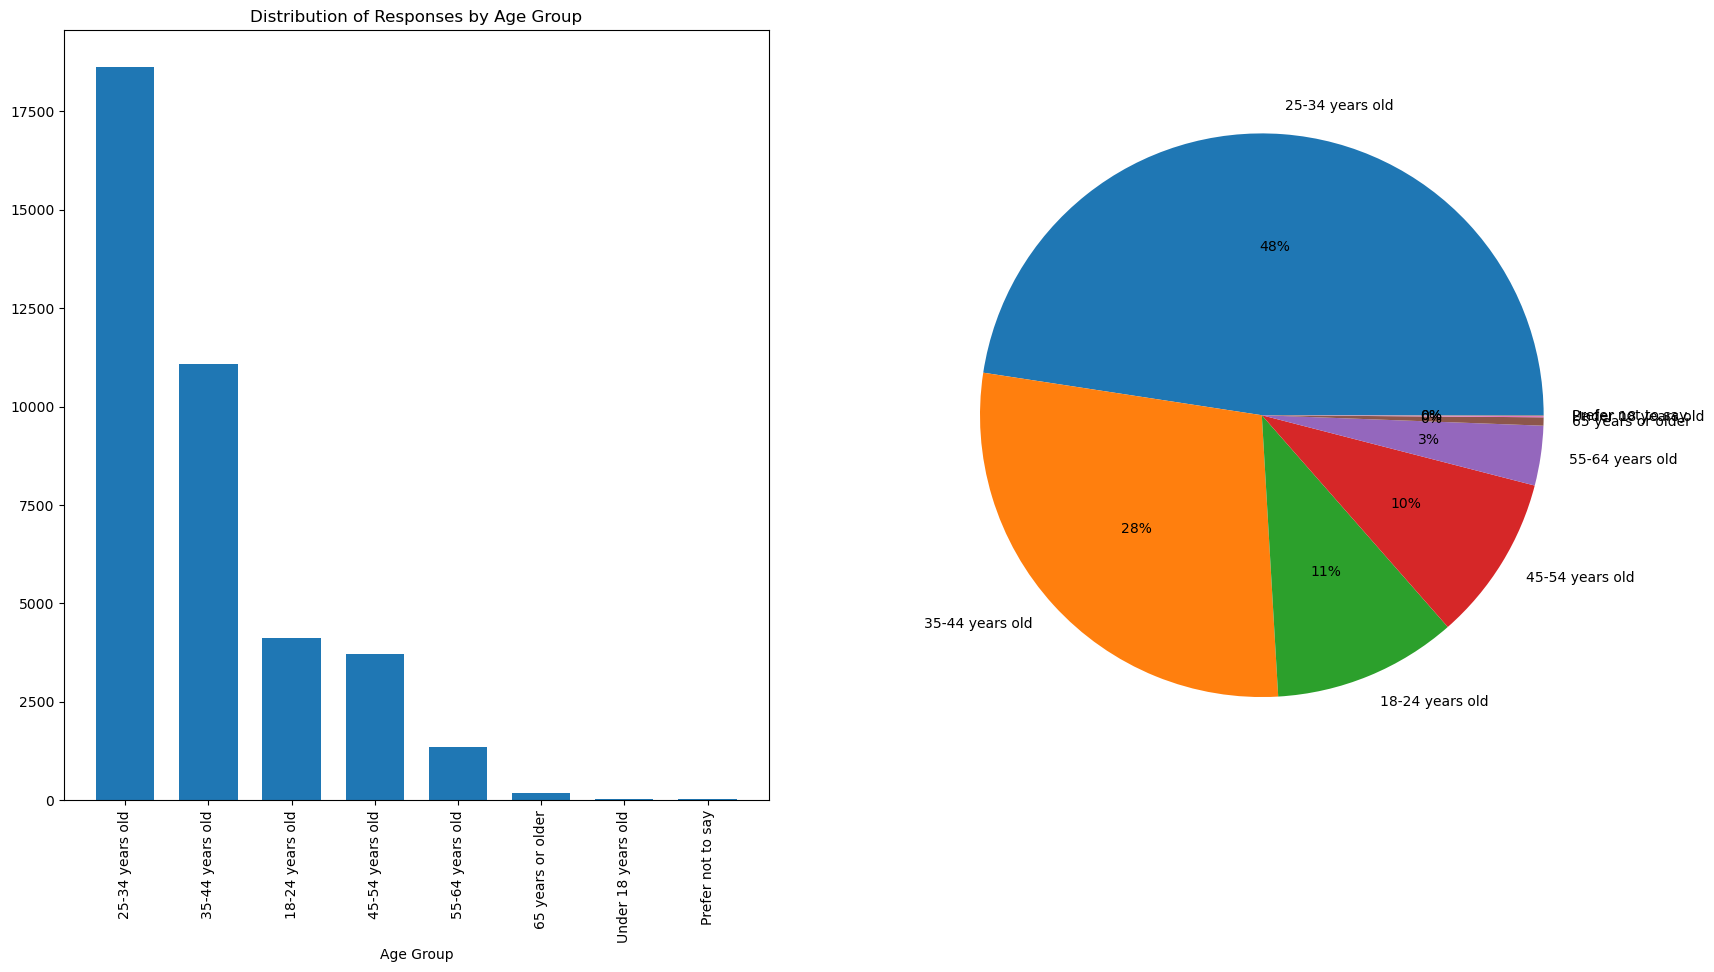

In [12]:
age = df["Age"].value_counts()

label = age.index
value = age.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)
plt.title('Distribution of Responses by Age Group')
plt.xlabel('Age Group')

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

#### 2.7.2 Education Group

Grouping the responses by the education group and displaying it

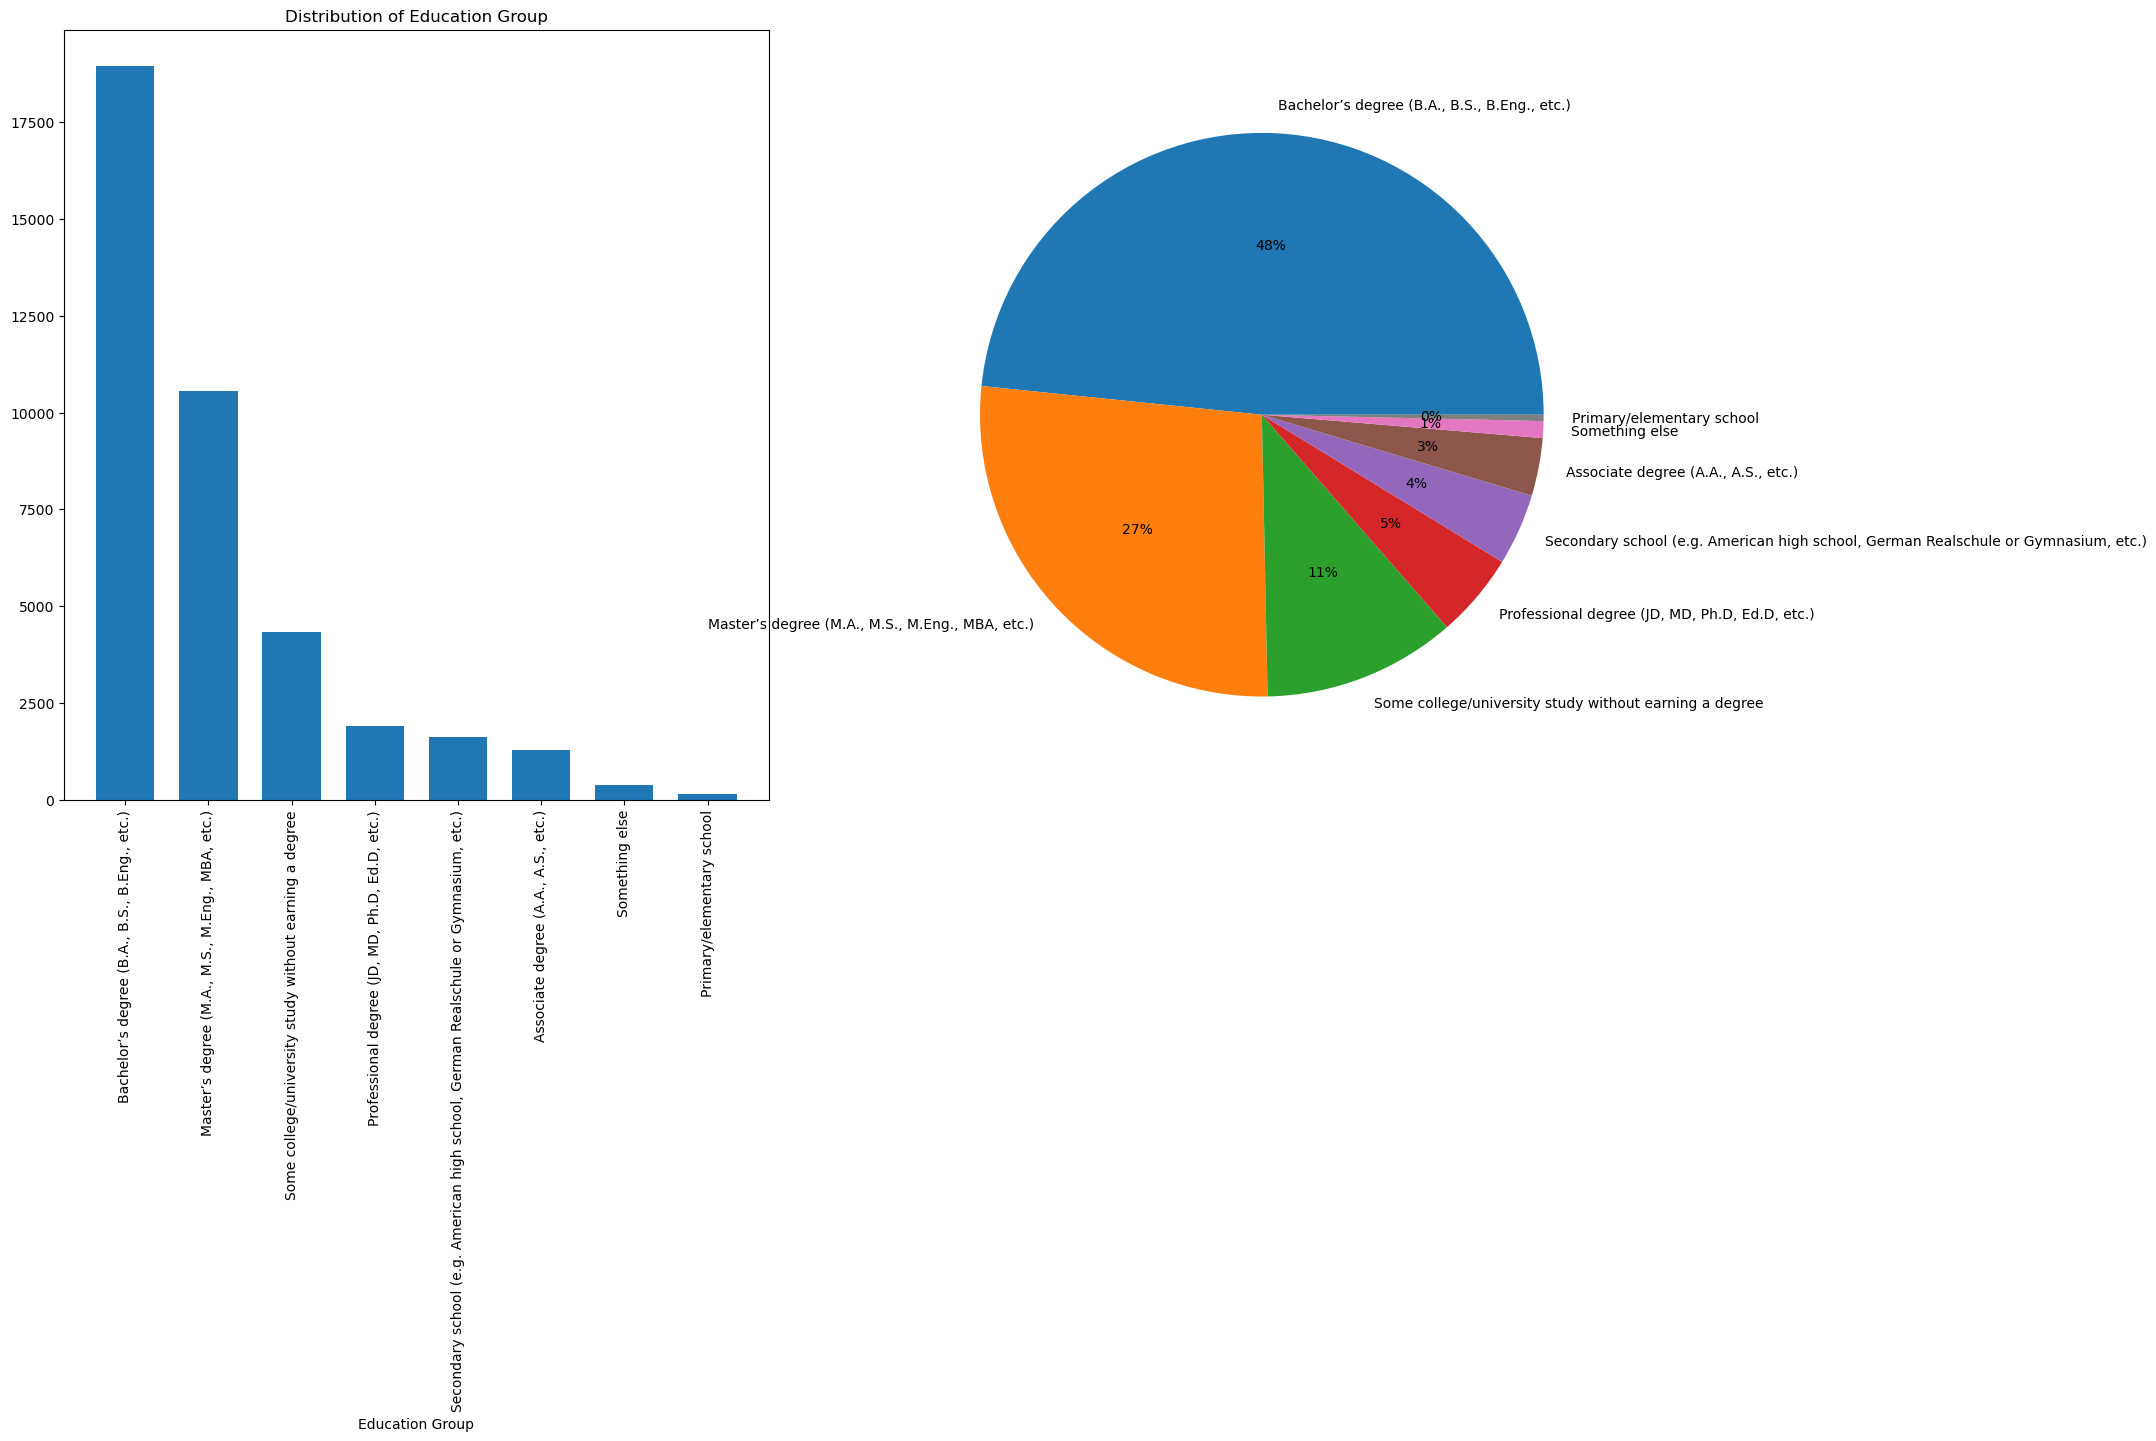

In [13]:
ed = df["EdLevel"].value_counts()

label = ed.index
value = ed.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.title('Distribution of Education Group')
plt.xlabel('Education Group')
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')
plt.show()

#### 2.7.3 Country Group

This function adds those countries with less than 400 entries into a `Other` category.

In [14]:
def shorten_categories(categories,cutoff):
    categories_map = {}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categories_map[categories.index[i]] = categories.index[i]
        else:
            categories_map[categories.index[i]] = 'Other'
    return categories_map

In [15]:
country_map = shorten_categories(df["Country"].value_counts(), 200)

df["Country"] = df["Country"].map(country_map)
df["Country"].value_counts()

Country
United States of America                                10569
Other                                                    4502
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440


#### 2.7.4 Displaying Country

Grouping the responses by the country and displaying it

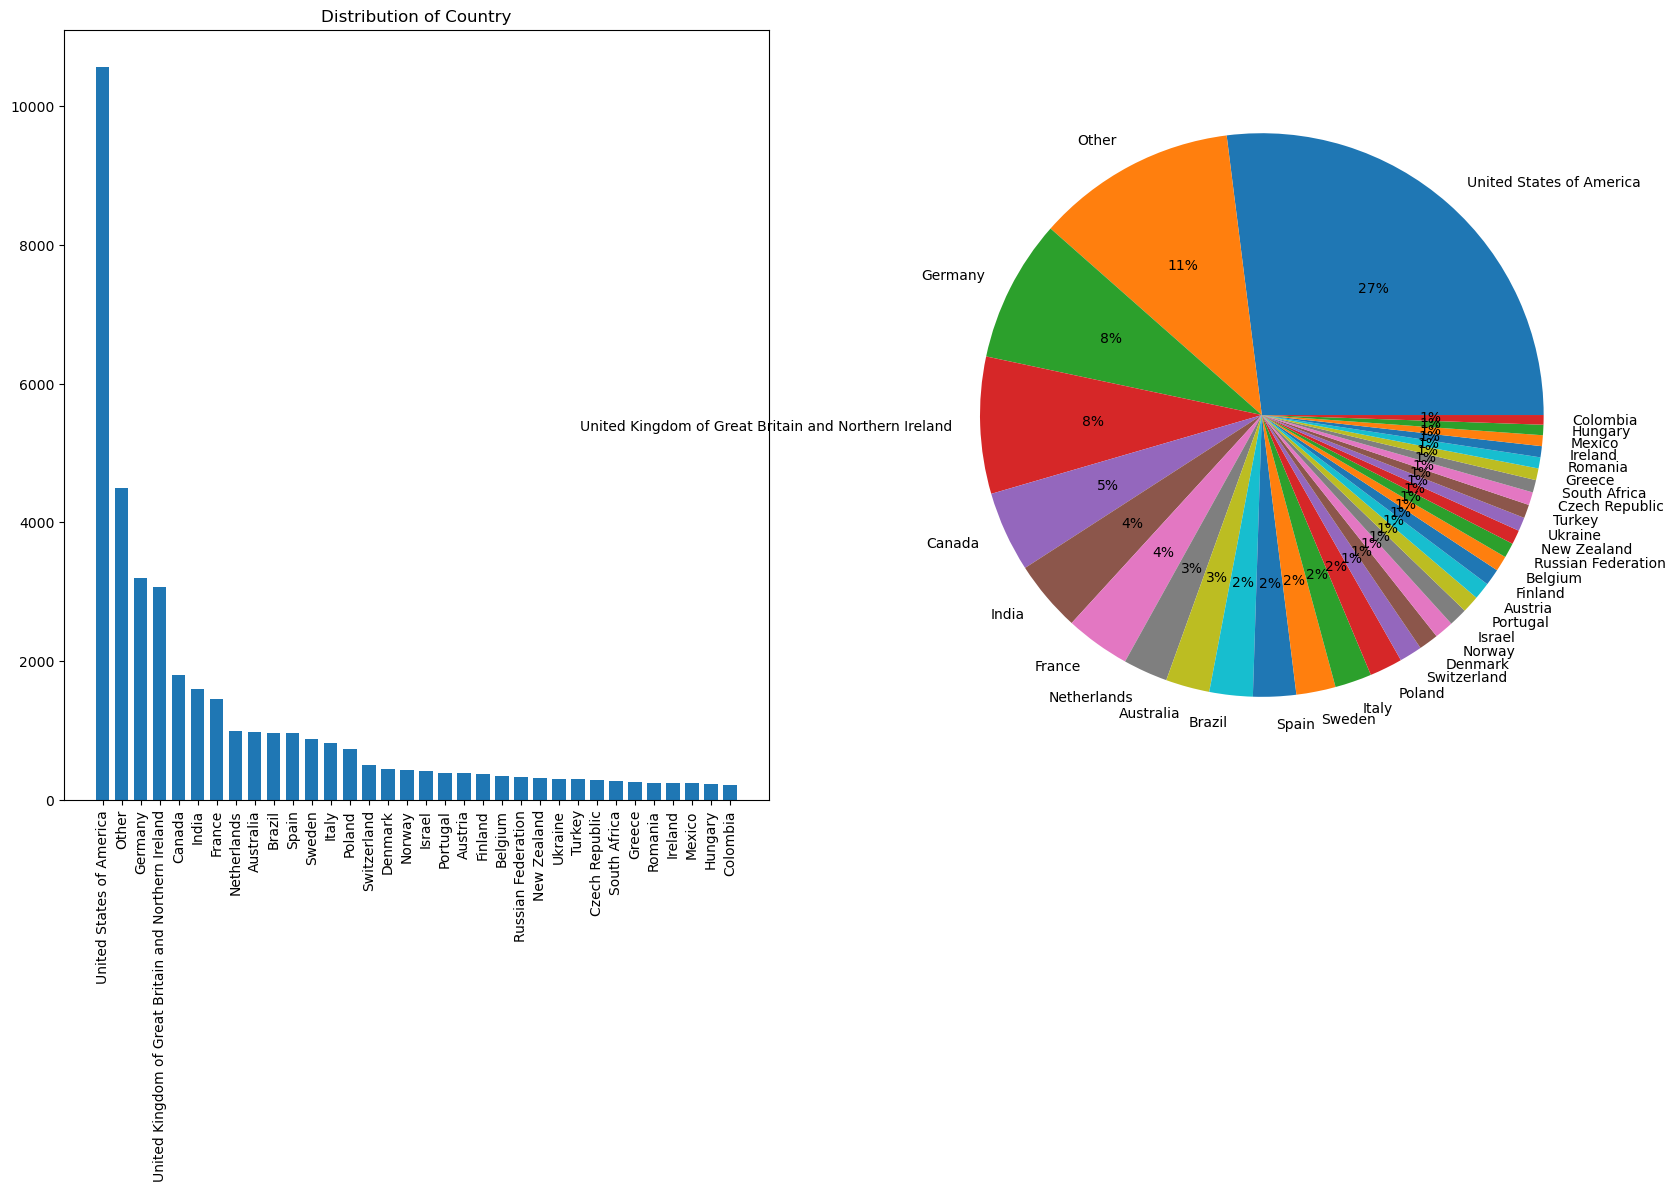

In [16]:
country = df["Country"].value_counts()

label = country.index
value = country.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)
plt.title('Distribution of Country')

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

#### 2.7.5 Displaying Remote Work

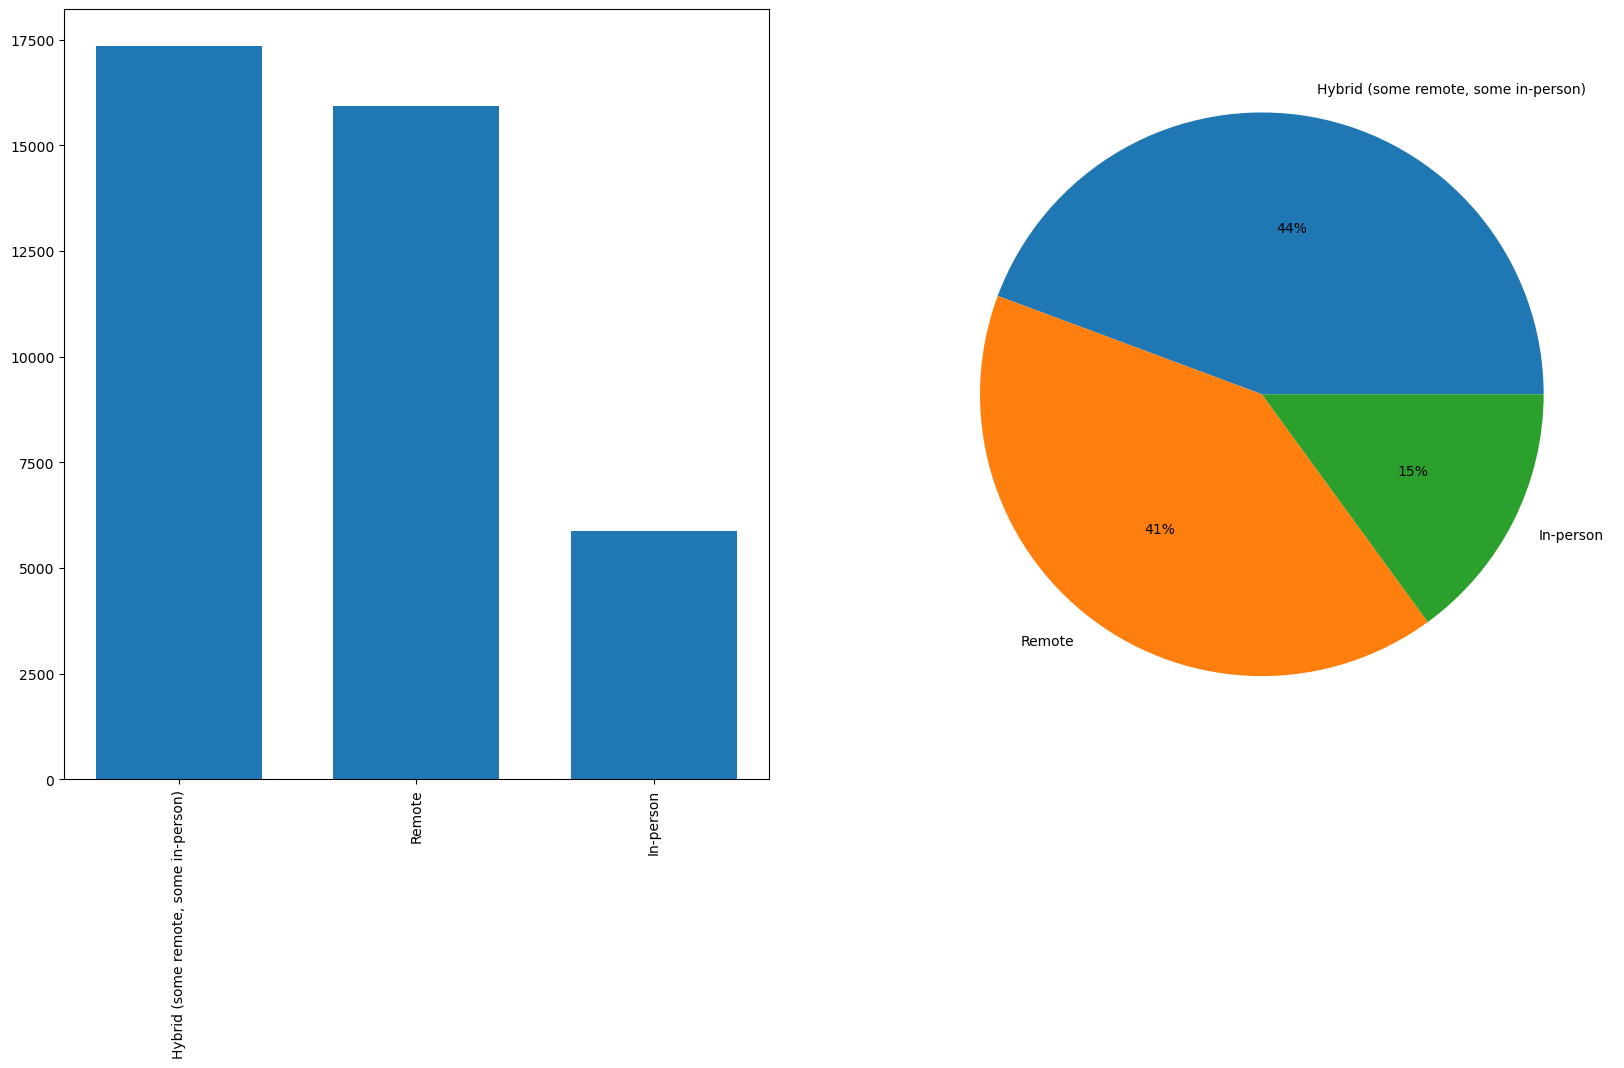

In [17]:
remote = df["RemoteWork"].value_counts()

label = remote.index
value = remote.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

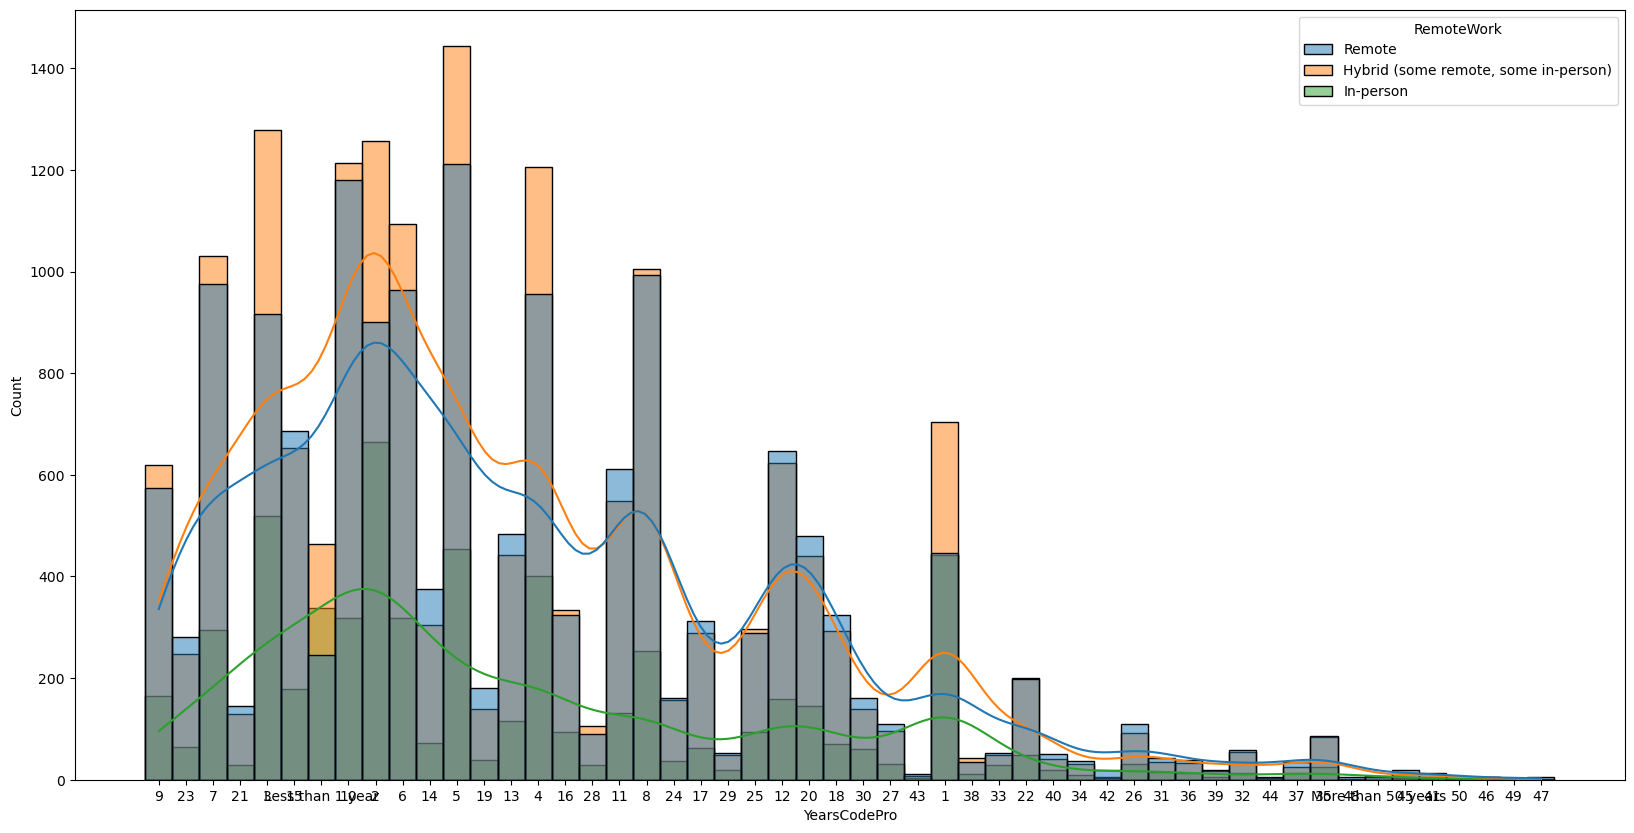

In [18]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x="YearsCodePro", hue="RemoteWork", kde=True, bins=30)
plt.show()

#### 2.7.6 Salary

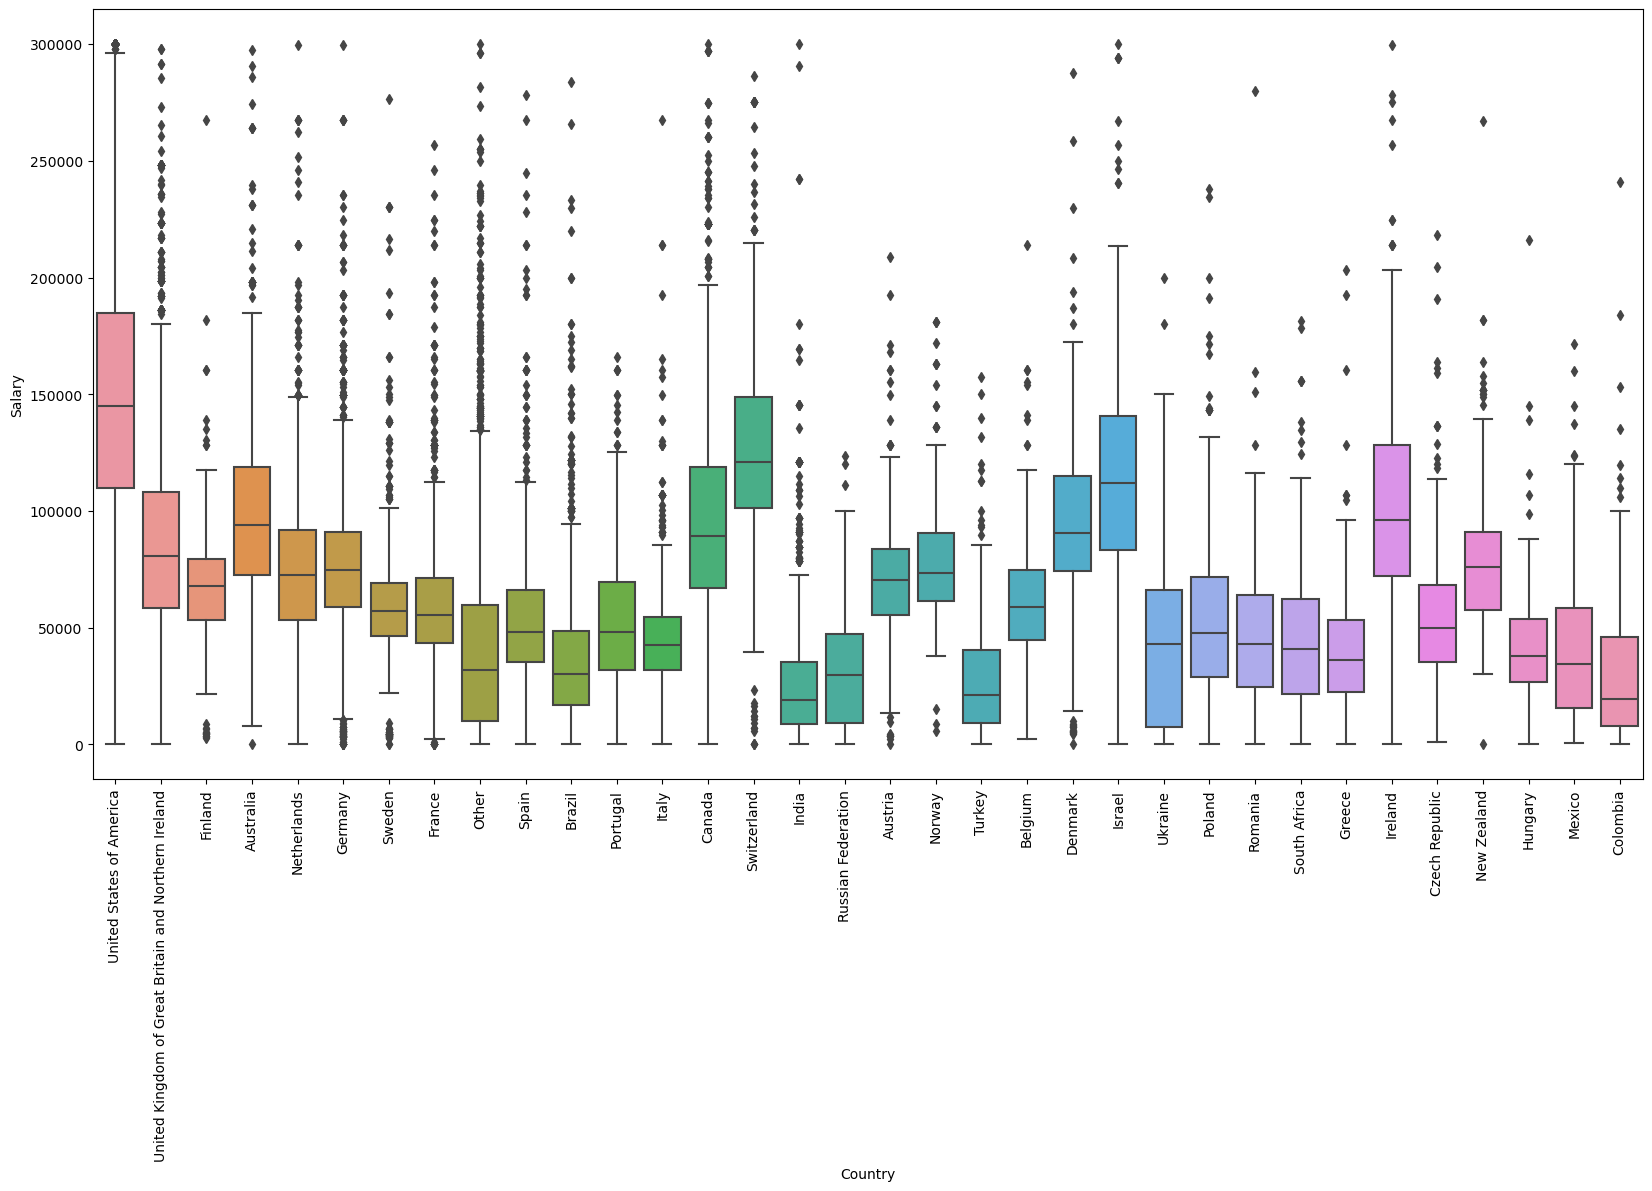

In [19]:
temp_df = df.copy()
temp_df = temp_df[temp_df["Salary"] <= 0.3*1e6]
plt.figure(figsize=(20, 10))
sns.boxplot(data=temp_df, x="Country", y="Salary")
plt.xticks(rotation=90)

plt.show()

> As we can see, there are so many outliers in the salary data for each country. Lets fix that by using `Capping Method`.

#### Capping Method:
The capping method based on the interquartile range, it address outliers in the salary data for each country. By doing this, it minimize the effect of extreme values by setting any salary below the 25th percentile to the value of the 25th percentile and any salary above the 75th percentile to the value of the 75th percentile.

BENEFITS:
- `Reduces Skewness:` This helps reduce the skewness of the data caused by extreme outliers, making statistical analysis more robust and representative of the typical data.
- `Improves Visualization:` It enhances the clarity of visual data representations by limiting the range of the data, which prevents extreme values from compressing the bulk of the data in visualizations like boxplots.
- `Standardizes Data by Country:` By adjusting based on country-specific percentiles, it takes into account the economic differences between countries, which is important when comparing salaries internationally.


https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code

#### Capping Method

In [20]:
data = df.groupby('Country')['Salary'].describe().reset_index()[['Country','25%','75%']]
data.head()

,Country,25%,75%
0,Australia,72714.0,118987.00
1,Austria,55472.0,84118.75
2,Belgium,44978.0,74963.00
3,Brazil,17042.0,48690.00
4,Canada,66916.0,118962.00


Calculate the 25th and 75th percentiles of salary within each country

In [21]:
df = df.merge(data, on = "Country", how ="left")
df.head()

,Country,Age,EdLevel,YearsCodePro,RemoteWork,Salary,25%,75%
0,United States of America,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,Remote,285000.0,110000.0,200000.0
1,United States of America,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Hybrid (some remote, some in-person)",250000.0,110000.0,200000.0
2,United States of America,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Hybrid (some remote, some in-person)",156000.0,110000.0,200000.0
3,United Kingdom of Great Britain and Northern I...,35-44 years old,Some college/university study without earning ...,21,Remote,96828.0,59586.0,111724.0
4,United States of America,35-44 years old,Some college/university study without earning ...,3,Remote,135000.0,110000.0,200000.0


Merge these percentiles back to the main dataframe

In [22]:
mask = df["Salary"]<df['25%']
df.loc[mask,"Salary"] = df["25%"]

mask = df["Salary"]>df['75%']
df.loc[mask,"Salary"] = df["75%"]

df

,Country,Age,EdLevel,YearsCodePro,RemoteWork,Salary,25%,75%
0,United States of America,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,Remote,200000.0,110000.0,200000.0
1,United States of America,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Hybrid (some remote, some in-person)",200000.0,110000.0,200000.0
2,United States of America,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Hybrid (some remote, some in-person)",156000.0,110000.0,200000.0
3,United Kingdom of Great Britain and Northern I...,35-44 years old,Some college/university study without earning ...,21,Remote,96828.0,59586.0,111724.0
4,United States of America,35-44 years old,Some college/university study without earning ...,3,Remote,135000.0,110000.0,200000.0
...,...,...,...,...,...,...,...,...
39150,Mexico,25-34 years old,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",5,"Hybrid (some remote, some in-person)",28625.0,15629.0,60056.0
39151,Brazil,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24,Remote,48690.0,17042.0,48690.0
39152,India,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Remote,15752.0,8724.0,35139.0
39153,France,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Hybrid (some remote, some in-person)",64254.0,43907.0,71750.0


Capping the salaries at the 25th percentile;

Capping the salaries at the 75th percentile;

and Displaying the head of the modified DataFrame;

#### 2.7.7 Salary Without Outliers

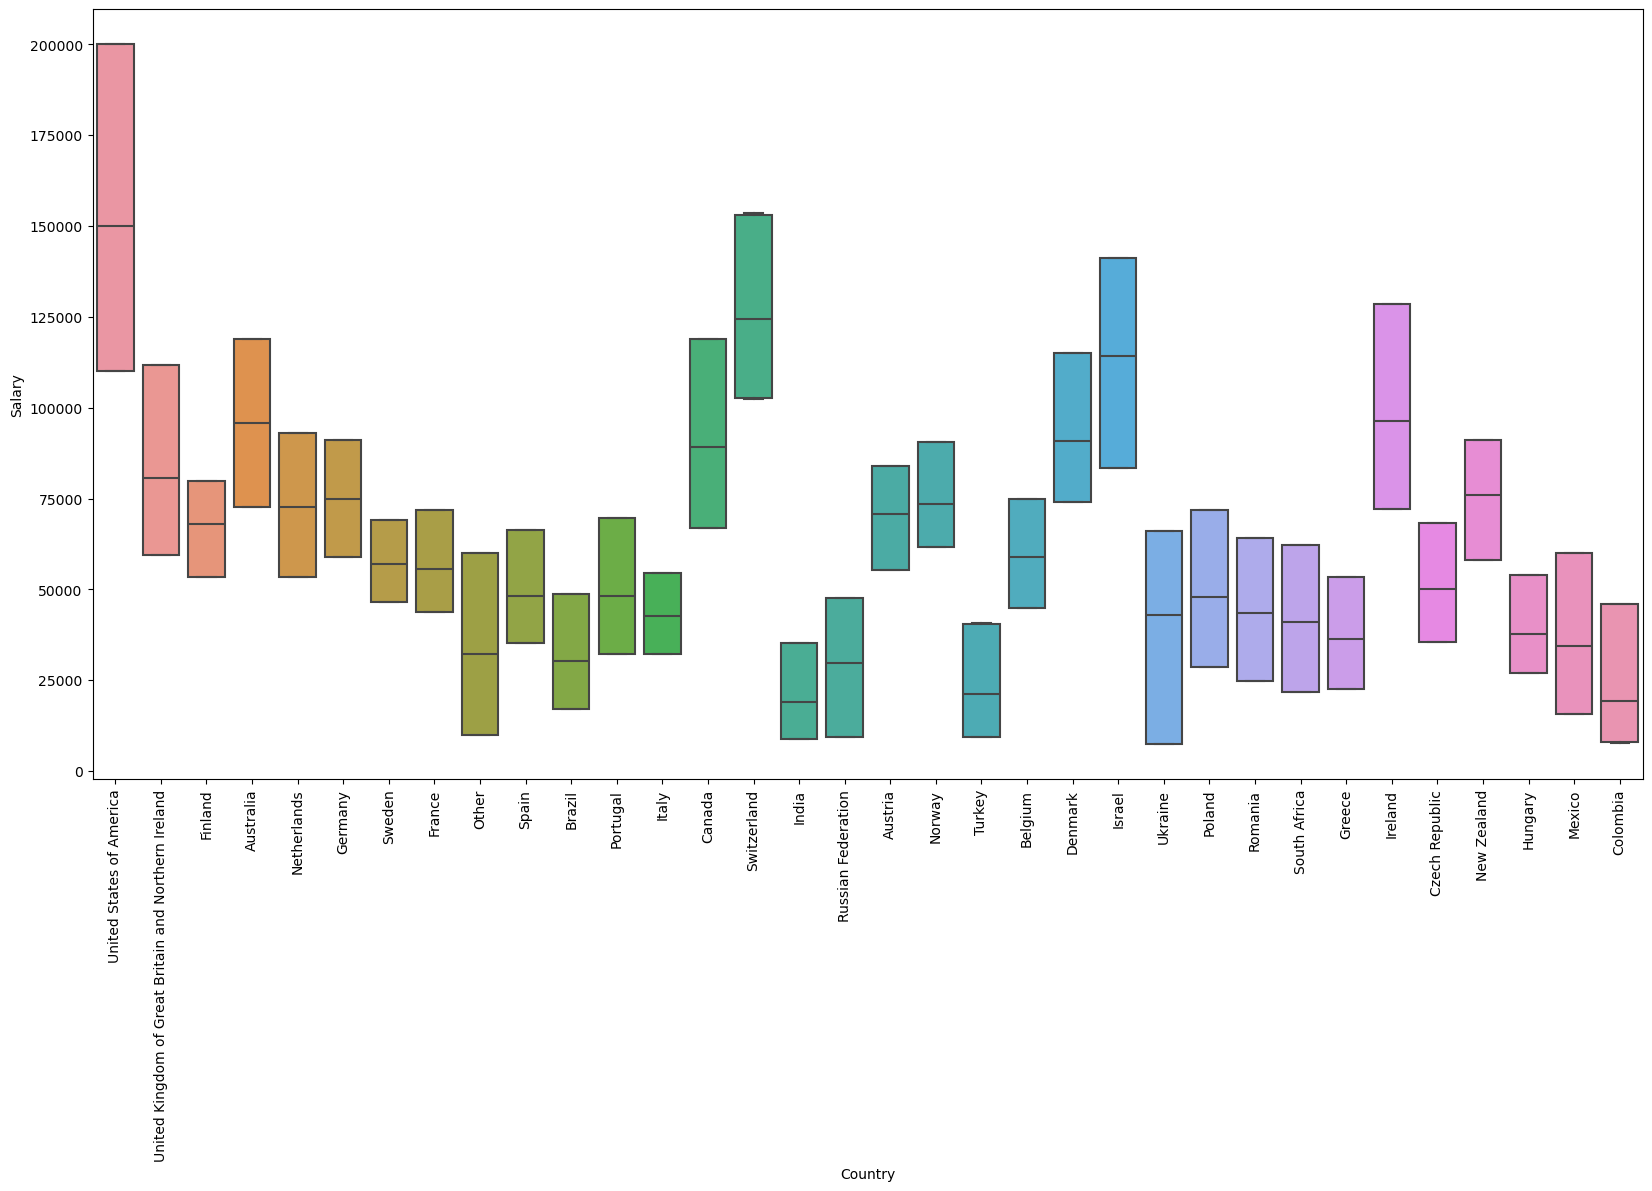

In [23]:
temp_df = df.copy()
temp_df = temp_df[temp_df["Salary"] <= 0.3*1e6]

plt.figure(figsize=(20, 10))
sns.boxplot(data=temp_df, x="Country", y="Salary")
plt.xticks(rotation=90)

plt.show()

#### 2.7.8 Salary by Country

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

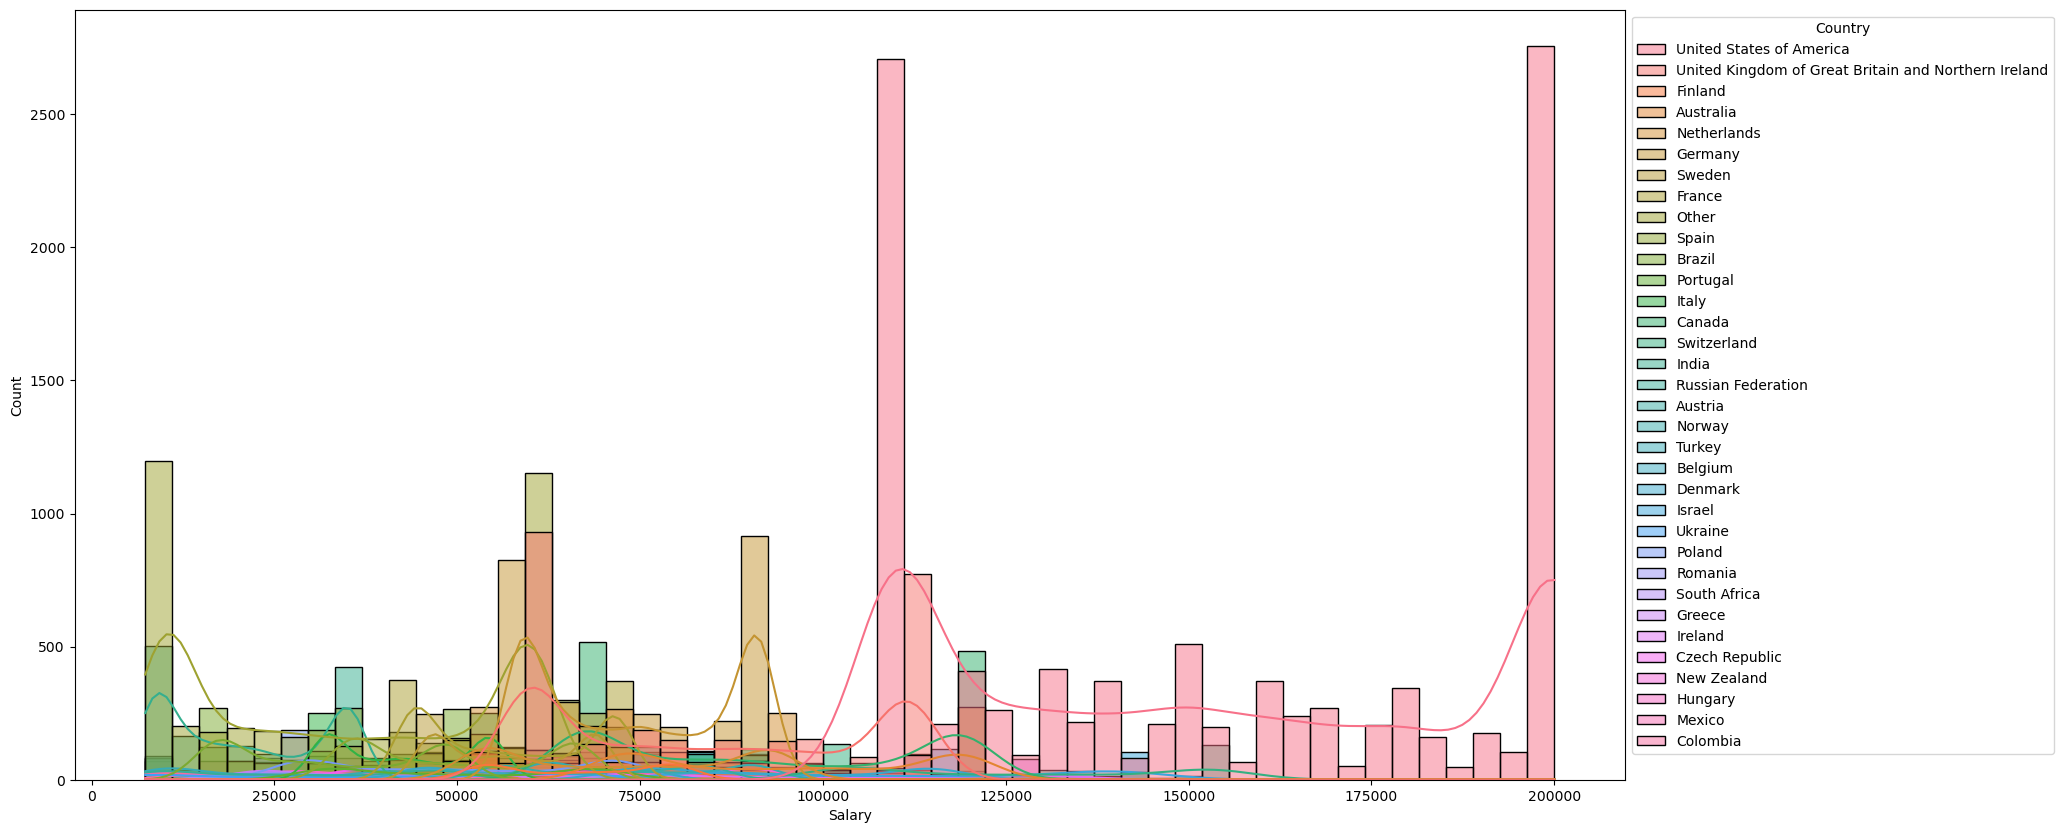

In [24]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data=df, x="Salary", hue="Country", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

#### 2.7.9 Salary by Age

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

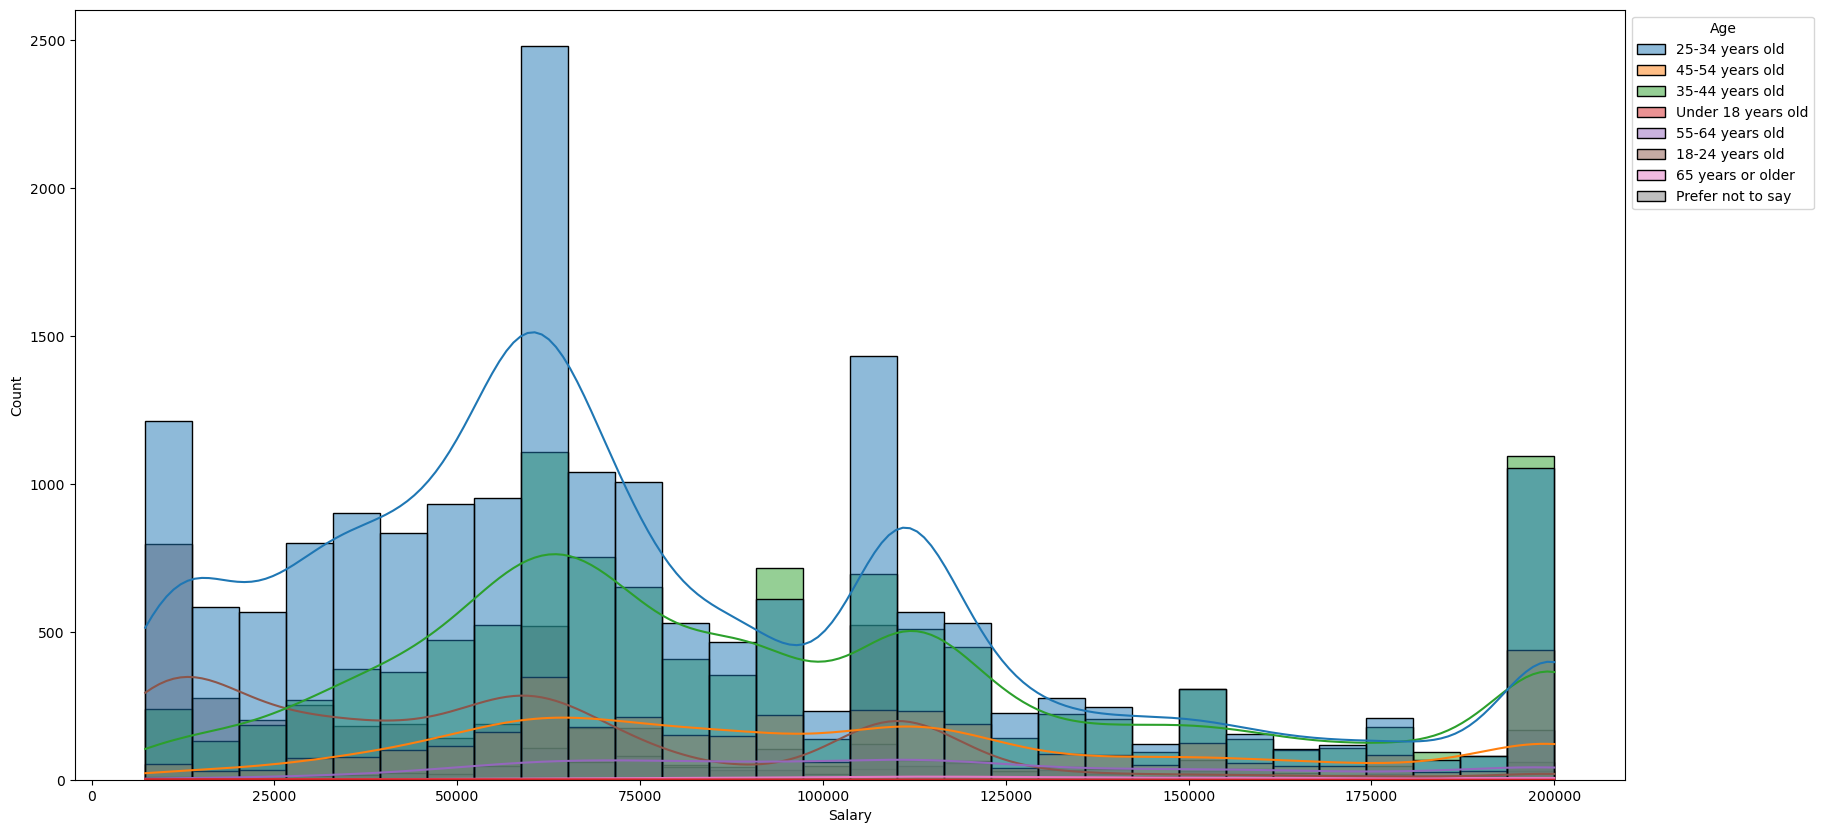

In [25]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data=df, x="Salary", hue="Age", kde=True, bins=30)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

#### 2.7.10 Salary by Education Level

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

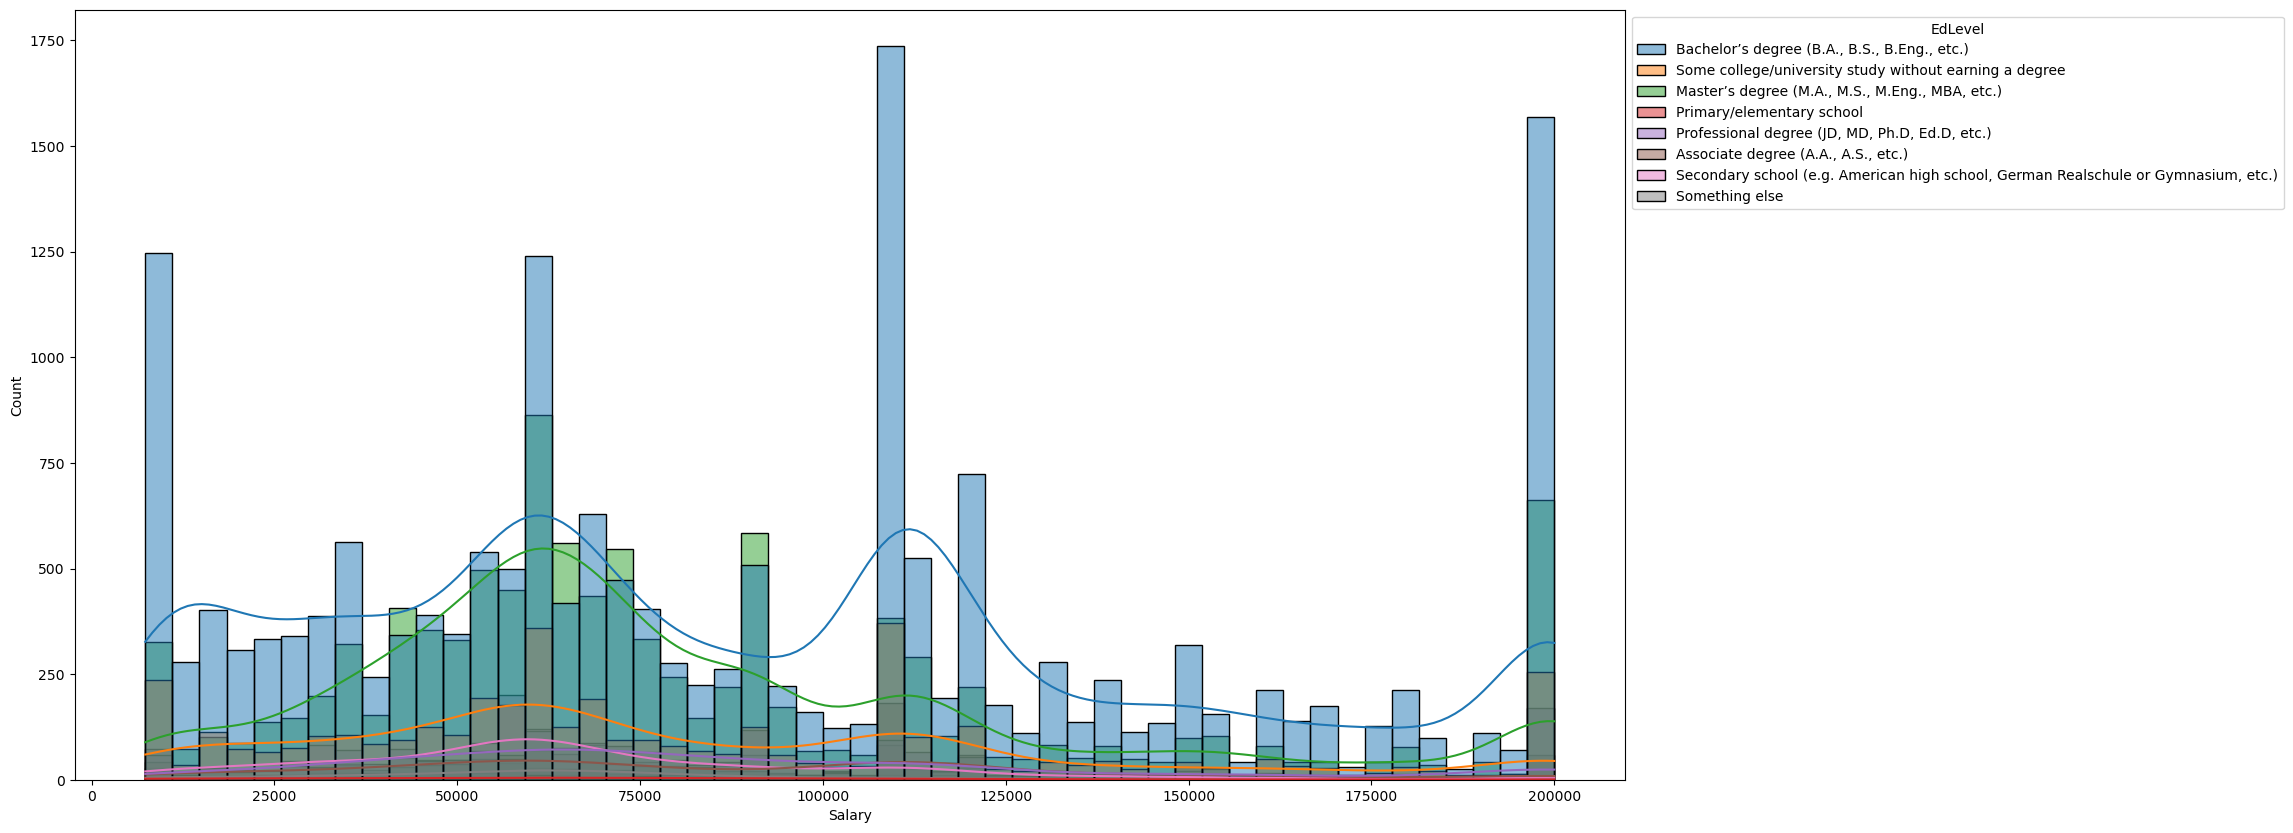

<Figure size 2000x1000 with 0 Axes>

In [26]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data=df, x="Salary", hue="EdLevel", kde=True)
plt.figure(figsize=(20, 10))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

#### 2.7.11 Salary by Hybrid, Remote and In Person

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

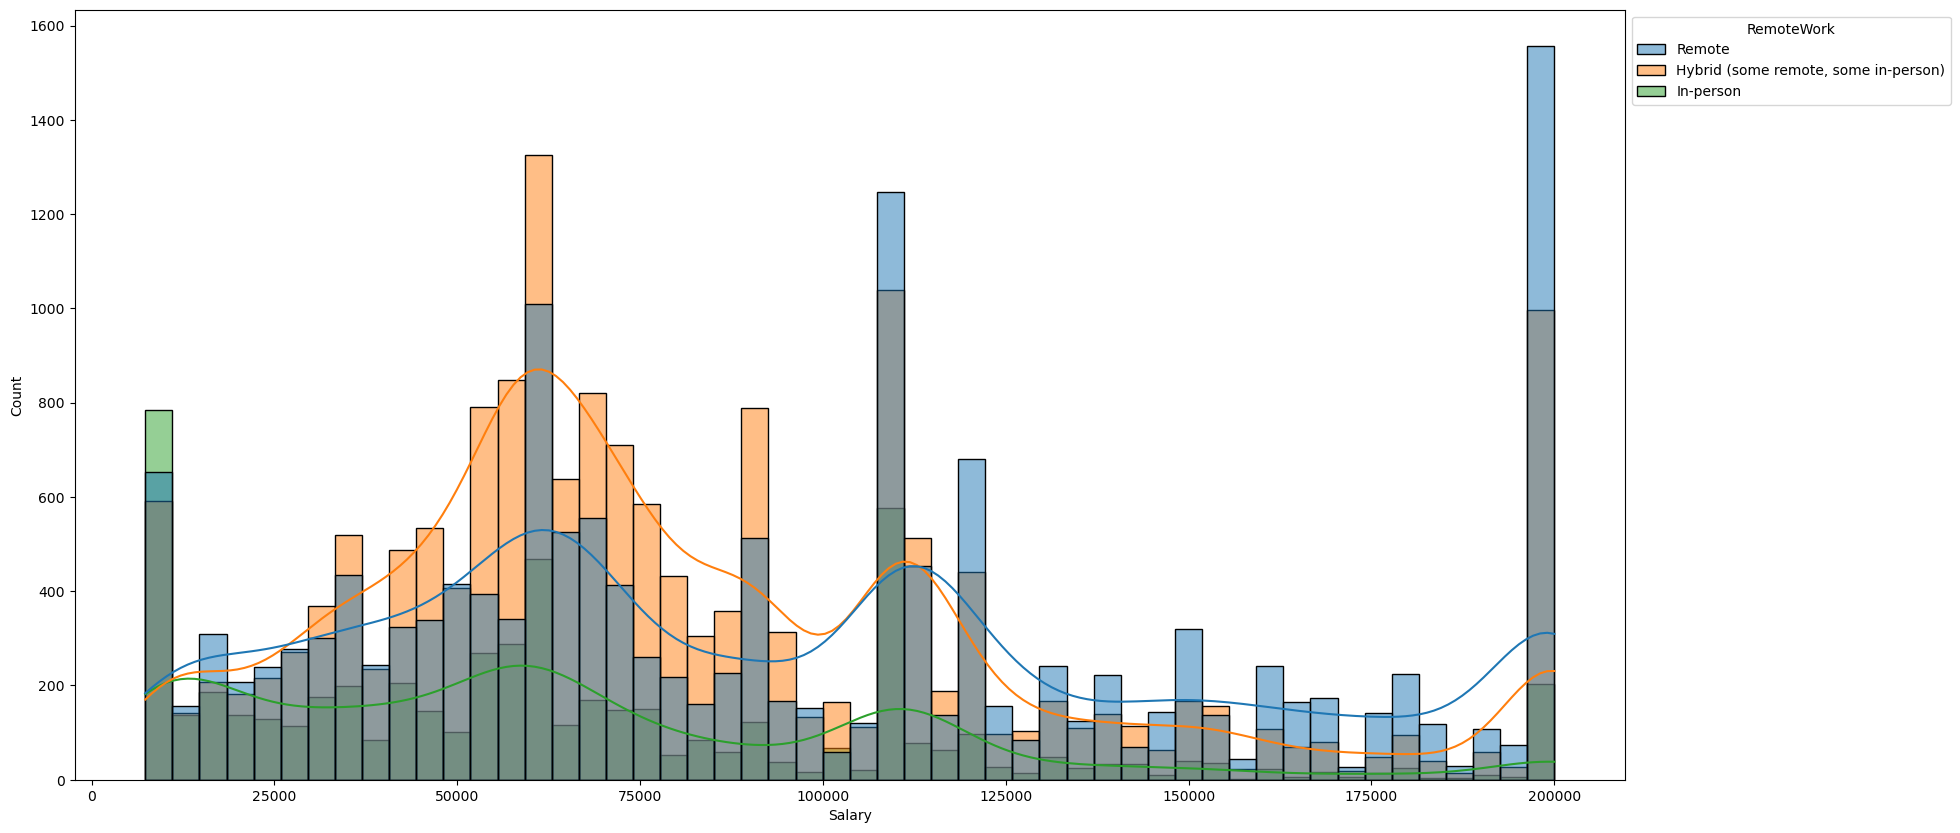

<Figure size 2000x1000 with 0 Axes>

In [27]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data=df, x="Salary", hue="RemoteWork", kde=True)
plt.figure(figsize=(20, 10))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

#### 2.7.12 Dropping Capping Method

In [28]:
df.drop(['25%','75%'],axis=1,inplace=True)

### 2.8 Handling "Age"

#### 2.8.1 Displaying Unique Values

In [29]:
df["Age"].unique()

array(['25-34 years old', '45-54 years old', '35-44 years old',
       'Under 18 years old', '55-64 years old', '18-24 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

#### 2.8.2 Clean Experience Function

In [30]:
def cleaned_age(x):
    if x == "45-54 years old":
        return 45
    if x == '25-34 years old':
        return 25
    if x == '35-44 years old':
        return 35
    if x == '55-64 years old':
        return 55
    if x == '18-24 years old':
        return 18
    if x == '65 years or older':
        return 65
    if x == 'Prefer not to say':
        return 0
    if x == 'Under 18 years old':
        return 17

df["Age"] = df["Age"].apply(cleaned_age)

df["Age"].value_counts()

Age
25    18633
35    11096
18     4128
45     3726
55     1340
65      186
17       27
0        19
Name: count, dtype: int64

#### 2.8.3 Remove 'Prefer not to say'

In [31]:
df = df[df["Age"]!= 0]

df["Age"].value_counts()

Age
25    18633
35    11096
18     4128
45     3726
55     1340
65      186
17       27
Name: count, dtype: int64

### 2.9 Handling "YearsCodePro"

#### 2.9.1 Displays Unique Values

In [32]:
df["YearsCodePro"].unique()

array(['9', '23', '7', '21', '3', '15', 'Less than 1 year', '10', '2',
       '6', '14', '5', '19', '13', '4', '16', '28', '11', '8', '24', '17',
       '29', '25', '12', '20', '18', '30', '27', '43', '1', '38', '33',
       '22', '40', '34', '42', '26', '31', '36', '39', '32', '44', '37',
       '35', '48', 'More than 50 years', '45', '41', '50', '46', '49',
       '47'], dtype=object)

#### 2.9.2 Clean Experience Function

In [33]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)

df["YearsCodePro"].unique()

C:\Users\mario\AppData\Local\Temp\ipykernel_8348\857395925.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)


array([ 9. , 23. ,  7. , 21. ,  3. , 15. ,  0.5, 10. ,  2. ,  6. , 14. ,
        5. , 19. , 13. ,  4. , 16. , 28. , 11. ,  8. , 24. , 17. , 29. ,
       25. , 12. , 20. , 18. , 30. , 27. , 43. ,  1. , 38. , 33. , 22. ,
       40. , 34. , 42. , 26. , 31. , 36. , 39. , 32. , 44. , 37. , 35. ,
       48. , 50. , 45. , 41. , 46. , 49. , 47. ])

### 2.10 Handling "EdLevel"

#### 2.10.1 Displays Uniques Values

In [34]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

#### 2.10.2 Clean Education Function

In [35]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

df["EdLevel"].unique()

C:\Users\mario\AppData\Local\Temp\ipykernel_8348\3250403368.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EdLevel'] = df['EdLevel'].apply(clean_education)


array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

### 2.11 Handling "RemoteWork"

In [36]:
df["RemoteWork"].unique()

array(['Remote', 'Hybrid (some remote, some in-person)', 'In-person'],
      dtype=object)

## 3. Model Development Setup

### 3.1 LabelEncoder

Using LabelEncoder to convert string to float: `'United States of America'`, if not using LabelEncoder, there will be a error because this dataset contains categorical or non-numeric data that the MinMaxScaler cannot process. The scaler expects all features to be numeric since it operates by scaling each feature to a given range, typically [0, 1].

These Categorical variables like `"EdLevel"`, `"Country"`, and `"RemoteWork"` are converted into numeric format using LabelEncoder. This is necessary because most machine learning algorithms require numerical input.

In [37]:
from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()
df["EdLevel"] = le_education.fit_transform(df["EdLevel"])

le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])

le_remote = LabelEncoder()
df["RemoteWork"] = le_remote.fit_transform(df["RemoteWork"])

C:\Users\mario\AppData\Local\Temp\ipykernel_8348\2592914109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EdLevel"] = le_education.fit_transform(df["EdLevel"])
C:\Users\mario\AppData\Local\Temp\ipykernel_8348\2592914109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Country"] = le_country.fit_transform(df["Country"])
C:\Users\mario\AppData\Local\Temp\ipykernel_8348\2592914109.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

### 3.2 Splitting the Feature and Target Columns Salary

The features `(X)` and the target variable `(y, which is "Salary")` are separated.

In [38]:
X = df.iloc[:,:-1]
y = df["Salary"]

### 3.3 Scaling the data and splitting train and test data

`Data Scaling:` The features are scaled using MinMaxScaler. This normalization ensures that no single feature will disproportionately impact the model due to its scale.

`Data Splitting:` The data is split into training sets (70%) and testing sets (30%) using train_test_split. This allows the models to be trained on one set of data and tested on an unseen set to evaluate their generalization capabilities.

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

mm = MinMaxScaler()
X = mm.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## 4. Models

### 4.1 LinearRegression
Linear Regression is used to predict a quantitative results based on one or more predictor variables. The model uses a linear relationship between the input features (like education, experience) and the target variable (such as salary).

Why Use LinearRegression for This Project?

1. `Simplicity and Interpretability:` Linear Regression is pretty straightforward—it tries to predict results by essentially drawing a straight line through your data. This makes it super easy to understand and interpret.

2. `Quick and Efficient:` This model doesn’t need a ton of computational power or data to get going, which can make it a lot faster and more efficient compared to more complex algorithms, especially when you have a limited dataset or need quick results.

3. `Basis for Understanding Relationships:` Linear Regression can help you see how changes in variables like years of experience or level of education directly impact salary, showing you how much each factor might increase or decrease salary expectations.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

lm = LinearRegression()
lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

print("Mean Absolute Error (MAE):",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R² Score:",r2_score(y_test,y_pred))

Mean Absolute Error (MAE): 35376.83960779805
Root Mean Squared Error (RMSE): 43120.126638447655
R² Score: 0.3154438397080518


> The model has relatively high errors (MAE = 35364.86, RMSE = 43106.26) and a low R² Score (0.3158), indicating a poor fit to the data.

### 4.2 DecisionTreeRegressor

The DecisionTreeRegressor is a type of decision tree model used specifically for regression tasks. It is like a flowchart tree structure, and it runs all its possible results, including outcomes, input costs and so on...

Why Use DecisionTreeRegressor for This Project?

1. `Handling Complex Stuff:` Salaries aren't straightforward. They depend on a bunch of things like where you went to school, how long you've been working, where you live, and the kind of job you do.

2. `It shows What Matters:` These trees can show us which lots of info (like your degree or years on the job) really play a big part in determining salaries.

3. `Handling Weird Patterns:` Sometimes, how much you earn doesn’t go up in a simple straight line as you gain more experience—instead, it might shoot up initially and then kind of level off. Decision trees are good at spotting and adapting to these funky patterns.

4. `Quick Learners:` If the economic scene shifts and the way salaries are structured changes, decision trees can catch up quickly.

In [41]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print("Mean Absolute Error (MAE):",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R² Score:",r2_score(y_test,y_pred))

Mean Absolute Error (MAE): 16881.08222341761
Root Mean Squared Error (RMSE): 23191.59614817723
R² Score: 0.8019794295953935


> The Decision Tree model significantly outperforms the Linear Regression with much lower errors (MAE = 16879.90, RMSE = 23027.32) and a much higher R² Score (0.8047). This suggests a good fit and better handling of non-linear relationships.

### 4.3 RandomForestRegressor
RandomForestRegressor is a model that operates by building decision trees at training time and outputting the average prediction of the individual trees.

Why RandomForestRegressor is Ideal for a Salary Prediction Project:

1. `Handling Complex Non-linear Relationships:` Unlike Linear Regression, RandomForest can handle complex non-linear relationships between features and the target variable. This makes it incredibly effective for salary data, which often involves interactions between variables that are not easily modeled with a simple linear approach.

2. `Feature Importance:` RandomForest is excellent at estimating which variables are important in predicting the target variable. It can provide insights into which features (like education level, years of experience, location, etc.) are most influential in determining salaries, helping to focus efforts on the most significant factors.

3. `Handling of Various Data Types and Missing Values:` This model can handle a mix of numerical and categorical data and is typically robust to outliers and other statistical issues, making it very flexible in real-world data scenarios.

4. `Doesn’t Require Feature Scaling:` RandomForest does not require input features to be scaled or normalized (unlike algorithms like SVM or linear/logistic regression that often perform better with normalized features).

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=1)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print("Mean Absolute Error (MAE):",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R² Score:",r2_score(y_test,y_pred))

Mean Absolute Error (MAE): 16334.379217276497
Root Mean Squared Error (RMSE): 22022.585064380233
R² Score: 0.8214394067982105


> This model performed the best among the three, with the lowest errors (MAE = 16422.34, RMSE = 22077.34) and the highest R² Score (0.8205).

## 5. Hyper Parameter Tuning

Using `GridSearchCV` to find the best model with the best parameters

### 5.1 Estimator: RandomForestRegressor

In [43]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = RandomForestRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [44]:
regressor = gs.best_estimator_

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 Score",r2_score(y_test,y_pred))
print("${:,.02f}".format(error))

R2 Score 0.83333178889769
$21,276.58


### 5.2 Estimator: DecisionTreeRegressor

In [45]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor1 = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor1, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [46]:
regressor1 = gs.best_estimator_

regressor1.fit(X_train, y_train)
y_pred = regressor1.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 Score",r2_score(y_test,y_pred))
print("${:,.02f}".format(error))

R2 Score 0.8254569704877761
$21,773.42


In [47]:
print(X_train.shape)

(27395, 5)


## 6. Predicting Using The Model

### 6.1 Country, Age, RemoteWork, EdLevel, YearsCodePro

In [48]:
Z = np.array([['United States of America',25,'In-person','Bachelor’s degree',5]])
Z

array([['United States of America', '25', 'In-person',
        'Bachelor’s degree', '5']], dtype='<U24')

In [49]:
Z[:,0] = le_country.transform(Z[:,0])
Z[:,2] = le_remote.transform(Z[:,2])
Z[:,3] = le_education.transform(Z[:,3])

Z = Z.astype(float)
Z = mm.transform(Z)

Z

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[ 1.        ,  0.16666667,  0.33333333, -0.01010101,  2.5       ]])

In [50]:
y_pred = regressor.predict(Z)
print("Salary Predicted: ", y_pred)

Salary Predicted:  [118941.85068985]


## 7. Saving The Model

### 7.1 Pickle

In [51]:
import pickle

In [52]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education,"le_remote":le_remote,"scaler":mm}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [53]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]
le_remote = data["le_remote"]
mm = data["scaler"]

### 7.3 Country, Age, RemoteWork, EdLevel, YearsCodePro

In [54]:
Y = np.array([['United States of America',25,'In-person','Bachelor’s degree',5]])
Y

array([['United States of America', '25', 'In-person',
        'Bachelor’s degree', '5']], dtype='<U24')

In [55]:
Y[:,0] = le_country.transform(Y[:,0])
Y[:,2] = le_remote.transform(Y[:,2])
Y[:,3] = le_education.transform(Y[:,3])

Y = Y.astype(float)
Y = mm.transform(Y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [56]:
y_pred = regressor_loaded.predict(Y)
print("Salary Predicted: ", y_pred)

Salary Predicted:  [118941.85068985]
